In [42]:
import numpy as np
import numpy.random as rng
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame, Series
from sympy import symbols, integrate, exp, oo
%matplotlib inline
import pandas as pd
from scipy.stats import t
from scipy.stats import expon
from scipy.stats import halfcauchy
from scipy.stats import norm
import numpy as np
import math
from scipy.stats import gamma

In [43]:
x=np.arange(10)
y=np.random.normal(x*5, 2)
print(x, y)

[0 1 2 3 4 5 6 7 8 9] [ -0.48533802   5.70268369  15.43596447  16.76781698  18.16794199
  24.77273715  29.06302616  31.45884915  40.11420308  46.50184031]


In [44]:
lstart=.5
gstart=.5

n=1000
lam=np.zeros(n)
gam=np.zeros(n)
alpha=np.zeros(n)
beta=np.zeros(n)
lam[0]=lstart
gam[0]=gstart
alpha[0]=0
beta[0]=0

laccept=np.zeros(n)
laccept[0]=1
gaccept=np.zeros(n)
gaccept[0]=1
aaccept=np.zeros(n)
aaccept[0]=1
baccept=np.zeros(n)
baccept[0]=1

accept=np.zeros(n)
accept[0]=1

ltau=2
gtau=3
atau=2
btau=3
a=1
b=1
import time


In [179]:
start = time.clock()
for i in range(1, n):
    alpha_star=np.random.normal(alpha[i-1], 2)
    beta_star=np.random.normal(beta[i-1], 2)
    m_lam_star=np.random.normal(gam[i-1], 3)
    if(m_lam_star>0):
        lam_star=m_lam_star
    else:
        lam_star=lam[i-1]

    r1=sum(norm.logpdf(y,  loc=alpha[i-1]+beta[i-1]*x, scale=lam_star))+gamma.logpdf(lam_star, a, scale=b)
    r2=sum(norm.logpdf(y,  loc=alpha[i-1]+beta[i-1]*x, scale=lam[i-1]))+gamma.logpdf(lam[i-1], a, scale=b)
    log_rl=r1-r2
     
    a1=sum(norm.logpdf(y, loc=alpha_star+beta[i-1]*x, scale=lam[i-1]))+norm.logpdf(alpha_star, 0, 10)
    a2=sum(norm.logpdf(y, loc=alpha[i-1]+beta[i-1]*x, scale=lam[i-1]))+norm.logpdf(alpha[i-1], 0, 10)
    log_ra=a1-a2

    b1=sum(norm.logpdf(y, loc=alpha[i-1]+beta_star*x, scale=lam[i-1]))+norm.logpdf(beta_star, 0, 10)
    b2=sum(norm.logpdf(y, loc=alpha[i-1]+beta[i-1]*x, scale=lam[i-1]))+norm.logpdf(beta[i-1], 0, 10)    
    log_rb=b1-b2
  
    meas=math.log(np.random.uniform(0,1))
  
    if exp(log_rl)>exp(meas) and m_lam_star>0:
        lam[i]=lam_star
    else:
        lam[i]=lam[i-1]
  
    if exp(log_rl)>exp(meas) and m_lam_star>0:
        laccept[i]=1
    else:
        laccept[i]=0
    
    
    if exp(log_ra)>exp(meas):
        alpha[i]=alpha_star
    else:
        alpha[i]=alpha[i-1]
    if exp(log_rb)>exp(meas):
        beta[i]=beta_star
    else:
        beta[i]=beta[i-1]
  
    if exp(log_ra)>exp(meas):
        aaccept[i]=1
    else:
        aaccept[i]=0
    if exp(log_rb)>exp(meas):
        baccept[i]=1
    else: baccept[i]=0

dt_mh_1000 = time.clock() - start
print('Time:', dt_mh_1000)

Time: 2.1935259999999914


0.143 0.001 0.001
2.78542968093 0.0005


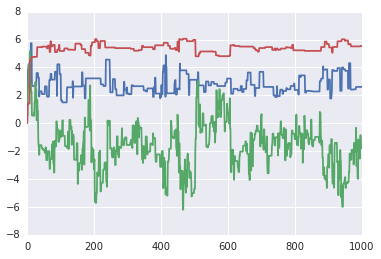

In [180]:
from numpy import mean
print(mean(laccept), mean(gaccept), mean(laccept*gaccept))

print(mean(lam), mean(gam))

plt.plot(lam)
plt.plot(alpha)
plt.plot(beta)

y_sim=mean(alpha)+mean(beta)*x

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


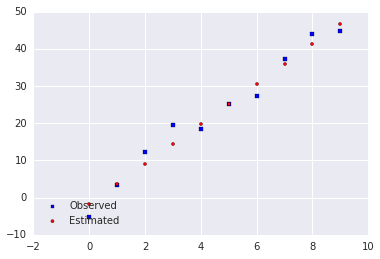

In [181]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=10, c='b', marker="s", label='Observed')
ax1.scatter(x, y_sim, s=10, c='r', marker="o", label='Estimated')
plt.legend(loc='lower left');
plt.show()

In [208]:
print(np.sum(y)/np.sum(x))

5.03448193974


In [226]:
lstart=.5
gstart=.5

n=1000
tau=np.zeros(n)+1
gam=np.zeros(n)
alpha=np.zeros(n)
beta=np.zeros(n)
lam[0]=lstart
gam[0]=gstart
alpha[0]=0
beta[0]=2
tau[0]=1

laccept=np.zeros(n)
laccept[0]=1
gaccept=np.zeros(n)
gaccept[0]=1
aaccept=np.zeros(n)
aaccept[0]=1
baccept=np.zeros(n)
baccept[0]=1

accept=np.zeros(n)
accept[0]=1

ltau=2
gtau=3
atau=2
btau=3
a=1
b=1
import time
tnot=1
print(mean(beta), mean(tau))

for i in range(1, n):
    s_n=np.sum(x**2)+tnot
    mu_n=(1/s_n)*(np.sum(x*y))
    beta[i]=norm.rvs(mu_n, (1/np.sqrt(tau[i-1]))*(1/np.sqrt(s_n)))
    tau[i]=gamma.rvs(a+n_y/2, 1/(np.sum(y**2) -mu_n*s_n*mu_n))

print(beta[0:20])

0.002 1.0
[ 2.          4.75827132  4.84010618  4.78884523  4.87080813  4.8341029
  4.80603136  4.84070026  4.83429859  4.81440383  4.82867977  4.83582648
  4.72363899  4.79621291  4.8181896   4.80109107  4.86036363  4.85782514
  4.8445604   4.83864422]


7.55025863688


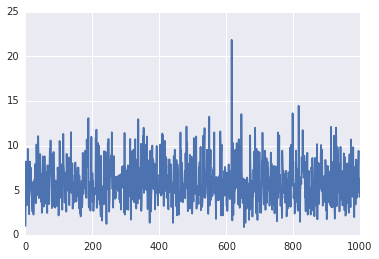

In [227]:
plt.plot(tau)
print(gamma.rvs(a+n_y/2, 1/(b+np.sum((y-(x*beta[i-1]))**2)/2)))

In [228]:
burn_in=n/2
print(mean(beta[burn_in:n]), mean(1/np.sqrt(tau[burn_in:n])))

4.8330325463 0.4433164751


/opt/conda/lib/python3.4/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


0.001 0.001 0.001
2.78542968093 0.0005


/opt/conda/lib/python3.4/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


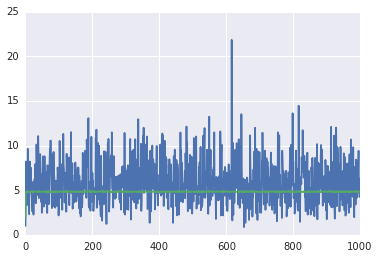

In [229]:
from numpy import mean
print(mean(laccept), mean(gaccept), mean(laccept*gaccept))

print(mean(lam), mean(gam))

plt.plot(tau)
plt.plot(beta)

y_sim=norm.rvs(x*mean(beta[burn_in:n]), 1/np.sqrt(mean(tau[burn_in:n])))

[0 1 2 3 4 5 6 7 8 9] [ -2.32338178   4.31701991   8.74519452  13.24980781  19.47630737
  25.46004176  30.14931738  36.58388606  40.39219352  49.5181599 ]


/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


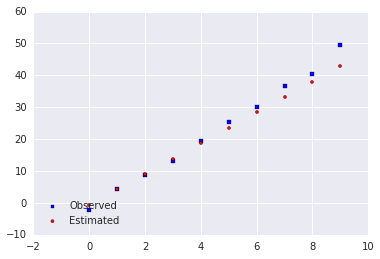

[ -2.32338178   4.31701991   8.74519452  13.24980781  19.47630737
  25.46004176  30.14931738  36.58388606  40.39219352  49.5181599 ]
[0 1 2 3 4 5 6 7 8 9]


In [230]:
x=np.arange(10)
y=np.random.normal(x*5, 2)

print(x, y)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=10, c='b', marker="s", label='Observed')
ax1.scatter(x, y_sim, s=10, c='r', marker="o", label='Estimated')
plt.legend(loc='lower left');
plt.show()
print(y)
print(x)